In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, plot_confusion_matrix

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex

## seaborn
import seaborn as sns
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("white")

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
import matplotlib.colors

plt.style.use('seaborn-white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

## plotly
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings("ignore")

Support Vector Machines
=============================

#### Table of contents

* [Support Vector Classifiers](#Support-Vector-Classifiers)
    * [Hyperplane](#Hyperplane)
    * [Support Vector Classifiers](#Support-Vector-Classifiers)
* [Support Vector Machines](#Support-Vector-Machines)
    * [Classification with Non-linear Decision Boundaries](#Classification-with-Non-linear-Decision-Boundaries)
    * [An Application to the Heart Disease Data](#An-Application-to-the-Heart-Disease-Data)
* [SVMs with More than Two Classes](#SVMs-with-More-than-Two-Classes)
* LAB
    * [Support Vector Classifier](#Support-Vector-Classifier)
    * [Support Vector Machine](#Support-Vector-Machine)
    * [ROC Curves](#ROC-Curves)
    * [SVM with Multiple Classes](#SVM-with-Multiple-Classes)
    * [Application to Gene Expression Data](#Application-to-Gene-Expression-Data)


# Support Vector Classifiers
## Hyperplane
A hyperplane is a subspace whose dimension is one less than that of its ambient space. For example, in a three-dimensional space,  hyperplanes are 2-dimensional planes. Similarly, in a two-dimensional space, hyperplanes are the 1-dimensional lines. See [this link](https://en.wikipedia.org/wiki/Hyperplane) for more information.

A hyper plan for a $p$-dimensional can be expressed as follow.
$$\beta_0 + \beta_1X_1 + \beta_2X_2 + . . . + \beta_pX_p = 0$$

Letting $X =(X_1, X_2, \ldots, X_p)^T$ in $p$-dimensional space satisfies, then $X$ lies on the hyperplane.

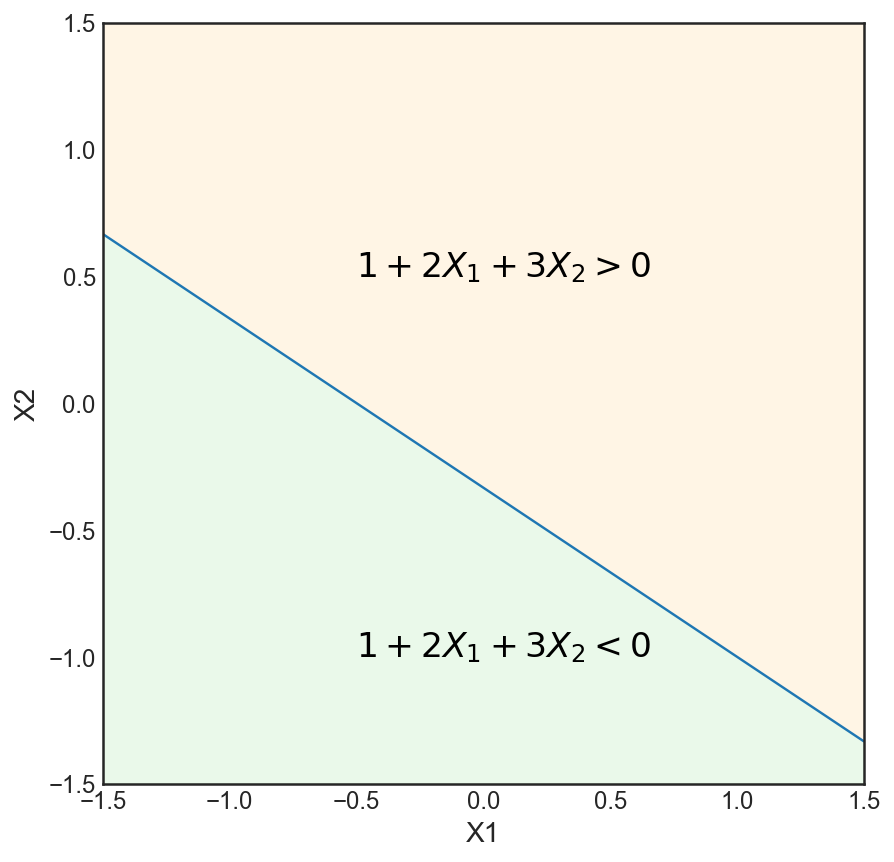

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
X1 = np.linspace(-1.5, 1.5, 1000)
X2 = -(1 + 2*X1)/3
_ = ax.plot(X1,X2)
_ = ax.set_xlabel('X1')
_ = ax.set_ylabel('X2')
_ = ax.set_xlim([- 1.5, 1.5])
_ = ax.set_ylim([- 1.5, 1.5])
# 1 + 2X1 + 3X2 > 0,
_ = ax.fill_between(X1, -1.5, -(1 + 2*X1)/3, color='LimeGreen',alpha=.1)
_ = ax.annotate(r'$1 + 2X_1 + 3X_2 > 0$', xy=(-0.5, 0.5), fontsize='xx-large')
# 1 + 2X1 + 3X2 < 0,
_ = ax.fill_between(X1, -(1 + 2*X1)/3, 1.5, color='Orange',alpha=.1)
_ = ax.annotate(r'$1 + 2X_1 + 3X_2 < 0$', xy=(-0.5, -1), fontsize='xx-large')
_ = ax.set_aspect('equal', 'box')

The hyperplane $1 + 2X_1 + 3X_2 = 0$ is shown.
* The **Green** region is the set of points for which $1 + 2X_1 + 3X_2 > 0$, 
* The **Orange** region is the set of points for which $1 + 2X_1 + 3X_2 < 0$.

## Support Vector Classifiers

The support vector classifier classifies a test observation depending on which side of a hyperplane it lies. The hyperplane is chosen to correctly separate most of the training observations into the two classes but may
misclassify a few observations.

Let $x_1$, $\ldots$ , $x_n \in \mathbb{R}^p$ be a set of $n$ training observation associated
class labels $y_1$, $\ldots$ , $y_n \in \{−1,~1\}$. Then,

\begin{align}
&\mbox{Maximize the margin M}\\
&\mbox{subject to:}\\
&\begin{cases}
\underbrace{y_i(\beta_0 + \beta_1 x_{i1}+\beta_2x_{i2}+\ldots+\beta_px_{ip})}_{\mbox{Distance from ith Hyperplance}}\geq M \underbrace{(1-\epsilon_i)}_{\mbox{slack variables}}\\
\sum_{j=1}^{p}\beta_j^2 =1,\\
\epsilon_i \geq 0\\
\sum_{i=1}^{n}\epsilon_i \leq C.
\end{cases}
\end{align}

where $C$ is a **nonnegative** tuning parameter and $M$ is the width of the margin; 

# Support Vector Machines

## Classification with Non-linear Decision Boundaries

Rather than fitting a support vector classifier using $p$ features
$$X_1, X_2, \ldots , X_p,$$
we could instead fit a support vector classifier using $2p$ features


\begin{align}
&\mbox{Maximize the margin M}\\
&\mbox{subject to:}\\
&\begin{cases}
y_i(\beta_0 + \sum_{j=1}^{p}\beta_{j1} x_{ij}+\sum_{j=1}^{p}\beta_{j2} x_{ij}^2)
\geq M (1-\epsilon_i)\\
\sum_{j=1}^{p} \sum_{k=1}^{2} \beta_{jk}^2 =1,\\
\epsilon_i \geq 0\\
\sum_{i=1}^{n}\epsilon_i \leq C.
\end{cases}
\end{align}

## The Support Vector Machine

The linear support vector classifier can be represented as

$$f(x) = \beta_0 + \sum_{i=1}^n \alpha_i\left< x, x_i\right>,$$

Letting $\mathcal{S}$ as the collection of indices, then,

$$f(x) = \beta_0 + \sum_{i\in \mathcal{S}} \alpha_i\left< x, x_i\right>.$$

In general, we replace it with a generalization of the inner product of the form

$$K(x_i, x_{i′}),$$

where $K$ is some function that we will refer to as a **kernel**. Then, we have

$$f(x) = \beta_0 + \sum_{i\in \mathcal{S}} \alpha_iK(x_i, x_{i'}).$$

| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kernel &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| Description |
|-------------------------------------------------------------------------------------------|-------------|
| $K(x_i, x_{i'}) = \sum_{j=1}^{p} x_{ij}x_{i'j}$ | Linear |
| $K(x_i, x_{i'}) = \left(1+\sum_{j=1}^{p} x_{ij}x_{i'j}\right)^d$ | Polynomial |
| $K(x_i, x_{i'}) = \exp\left(-\gamma \sum_{j=1}^{p} \left( x_{ij}-x_{i'j}\right)^2\right)$ | Radial |


## An Application to the Heart Disease Data

We now investigate how an SVM compares to LDA on this data. 

<div class="alert alert-block alert-info">
<font size="+2"><b>Heart Example Dataset</b></font>
</div>

These data contain a binary outcome **AHD** for 303 patients who presented with chest pain. An outcome value of **Yes** indicates the presence of heart disease based on an angiographic test, while **No** means no heart disease. There are 13 predictors including **Age**, **Sex**, **Chol** (a cholesterol measurement), and other heart and lung function measurements. Cross-validation results in a tree with six terminal nodes.

Dataset available on at this [link](http://faculty.marshall.usc.edu/gareth-james/ISL/Heart.csv)

In [3]:
Heart = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
display(Heart.head())

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No

We can use [**Pandas Factorize**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) to encode categorical variables as follows,

$$\mbox{Chest Pain} = 
\begin{cases}
0,&\mbox{Typical},\\
1,&\mbox{Asymptomatic},\\
2,&\mbox{Non-Anginal},\\
3,&\mbox{Non-Typical}.
\end{cases},
\qquad
\mbox{Thal} = 
\begin{cases}
0,&\mbox{Fixed},\\
1,&\mbox{Normal},\\
2,&\mbox{Reversable}.
\end{cases},
\qquad
\mbox{AHD} = 
\begin{cases}
0,&\mbox{No},\\
1,&\mbox{Yes}.
\end{cases}.
$$

In [4]:
Heart['ChestPain'] = pd.factorize(Heart['ChestPain'])[0]
Heart['Thal'] = pd.factorize(Heart['Thal'])[0]
Heart['AHD'] = pd.factorize(Heart['AHD'])[0]

After removing 6 missing observations, the data consist of 297 subjects, which we randomly split into 207 training and 90 test observations.

In [5]:
X = Heart.drop('AHD', axis=1)
y = Heart['AHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)
pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
                   'Shape':[X_train.shape, X_test.shape, y_train.shape, y_test.shape]}).set_index('Set').T

Set      X_train    X_test y_train y_test
Shape  (207, 13)  (90, 13)  (207,)  (90,)

In [6]:
Gamma = [10.0**x for x in np.arange(-1,-4,-1)]
# SVC
svc = SVC(C = 1,kernel='linear')
_ = svc.fit(X_train, y_train)
# SVM (gamma = 0.1)
svm1 = SVC(C=1, kernel='rbf', gamma = Gamma[0])
_ = svm1.fit(X_train, y_train)
# SVM (gamma = 0.01)
svm2 = SVC(C=1, kernel='rbf', gamma = Gamma[1])
_ = svm2.fit(X_train, y_train)
# SVM (gamma = 0.001)
svm3 = SVC(C=1, kernel='rbf', gamma = Gamma[2])
_ = svm3.fit(X_train, y_train)
# LDA
LDA = LinearDiscriminantAnalysis(solver='svd')
_ = LDA.fit(X_train, y_train)

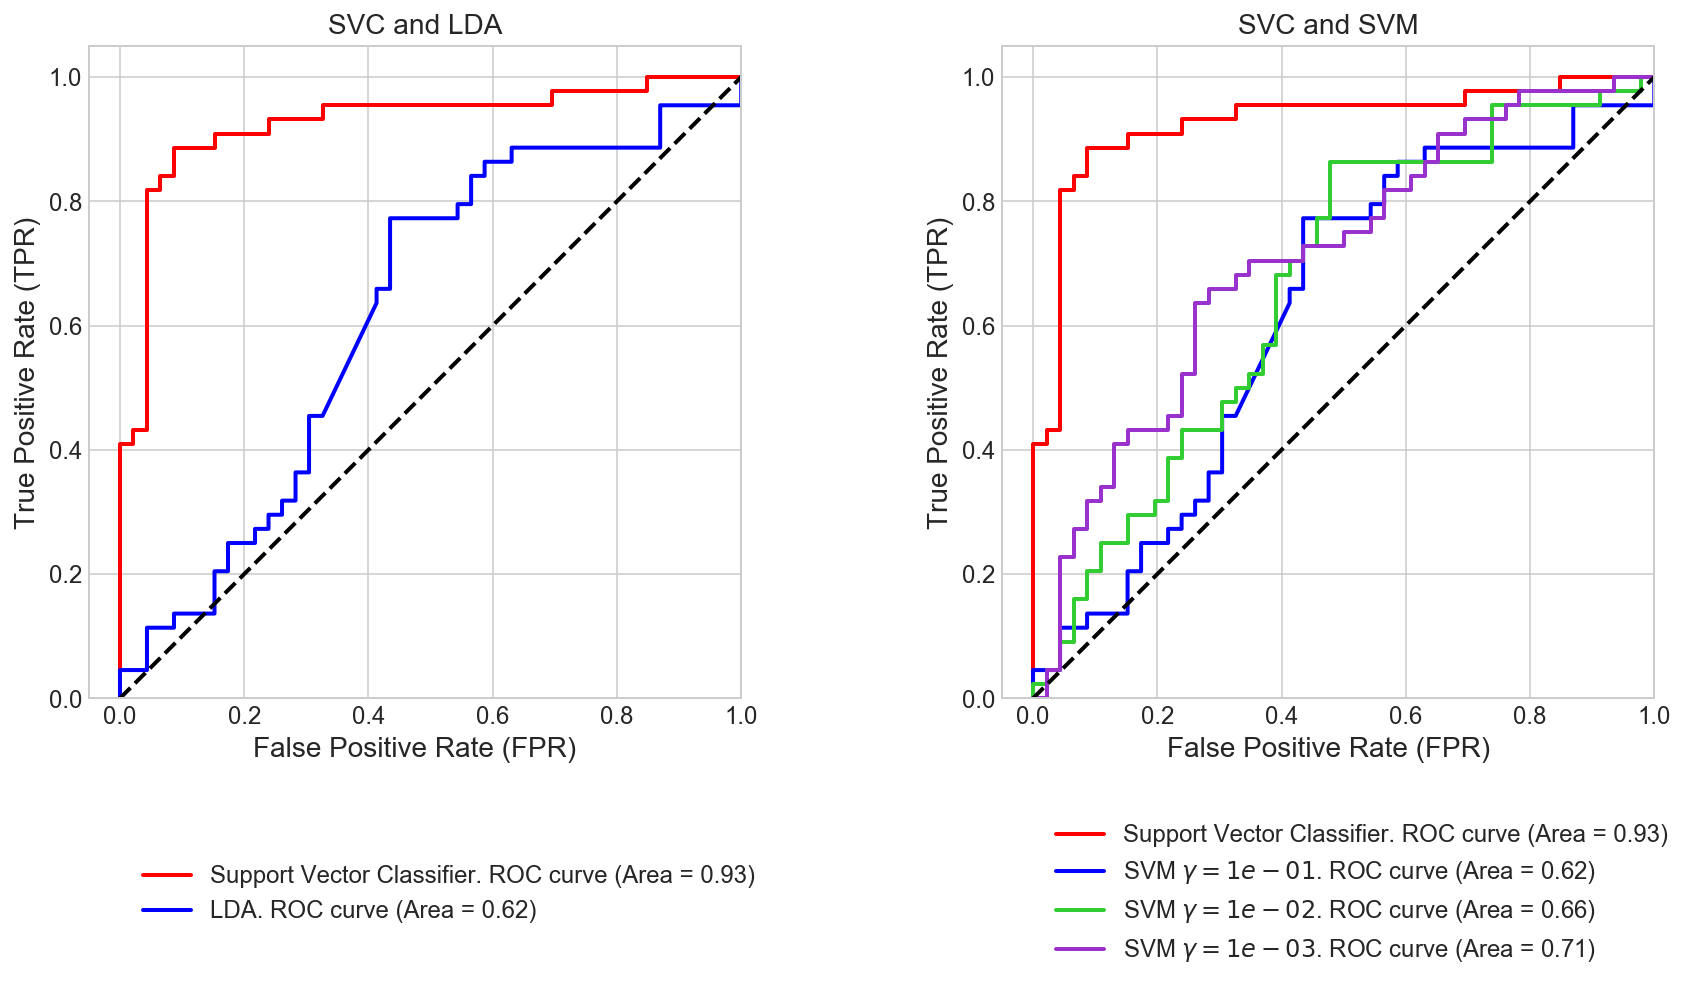

In [7]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15,6))

## Left Plot##
# false positive rates and true positive rates
fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
fpr1, tpr1, _ = roc_curve(y_test, svm1.decision_function(X_test))
_ = ax[0].plot(fpr, tpr, lw=2, label='Support Vector Classifier. ROC curve (Area = %0.2f)' % auc(fpr, tpr), color='Red')
_ = ax[0].plot(fpr1, tpr1, lw=2, label='LDA. ROC curve (Area = %0.2f)' % auc(fpr1, tpr1), color='Blue')
_ = ax[0].set_title('SVC and LDA')

del fpr1, tpr1
## Right Plot ##
# false positive rates and true positive rates
fpr1, tpr1, _ = roc_curve(y_test, svm1.decision_function(X_test))
fpr2, tpr2, _ = roc_curve(y_test, svm2.decision_function(X_test))
fpr3, tpr3, _ = roc_curve(y_test, svm3.decision_function(X_test))

_ = ax[1].plot(fpr, tpr, lw=2, label='Support Vector Classifier. ROC curve (Area = %0.2f)' % auc(fpr, tpr), color='Red')
_ = ax[1].plot(fpr1, tpr1, lw=2, label='SVM $\gamma = %.0e$. ROC curve (Area = %0.2f)' % (Gamma[0], auc(fpr1, tpr1)),
               color='Blue')
_ = ax[1].plot(fpr2, tpr2, lw=2, label='SVM $\gamma = %.0e$. ROC curve (Area = %0.2f)' % (Gamma[1], auc(fpr2, tpr2)),
               color='LimeGreen')
_ = ax[1].plot(fpr3, tpr3, lw=2, label='SVM $\gamma = %.0e$. ROC curve (Area = %0.2f)' % (Gamma[2], auc(fpr3, tpr3)),
               color='DarkOrchid')
_ = ax[1].set_title('SVC and SVM')

del fpr, tpr, fpr1, tpr1, fpr2, tpr2, fpr3, tpr3

## Settings
for a in ax:
    a.plot([0, 1], [0, 1], 'k--', lw=2)
    a.set_xlim([-0.05, 1.0])
    a.set_ylim([0.0, 1.05])
    a.set_xlabel('False Positive Rate (FPR)')
    a.set_ylabel('True Positive Rate (TPR)')
    a.legend(loc='center left', bbox_to_anchor=(.05, -0.3), fontsize = 12)
    a.set_aspect('equal', 'box')
del a

# SVMs with More than Two Classes

SVM can be written as:
$$\min_{\beta_0, \beta_1,\ldots,\beta_p} \left\{
\sum_{i=1}^{n}\max[0,1~-~y_if(x_i)]+\lambda \sum_{j=1}^{p}\beta_j^2
\right\}$$

with $f(X) = \beta_0 + \beta_1X_1 + \ldots + \beta_pX_p$


Many of the methods we've seen so far take the form:

$$\min_{\beta_0, \beta_1,\ldots,\beta_p} \left\{\underbrace{L(X, y, \beta)}_{\mbox{Loss}} + \underbrace{\lambda P(\beta)}_{\mbox{Penalty}}\right\}$$
where $\lambda$ is a nonnegative tuning parameter. 

Now, the loss function from the above SVM expersion can be seen as follows,

$$L(X, y, \beta) = \sum_{i=1}^{n}\max[0,1~-~y_i \left(\beta_0 + \beta_1x_{i1} + \ldots + \beta_px_{ip}\right)]$$

<div class="alert alert-success" role="alert">
<font size="+3"><b>LAB</b></font>
</div>

## Support Vector Classifier

Define a function to plot a classifier with support vectors.

In [8]:
ColorMap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['OrangeRed', 'Lime', 'RoyalBlue'])
# ColorMap = plt.cm.Set2

def Plot_SVC(svc, X, y, h=0.02, pad=0.25, ax = False, fs = 7, ColorMap = ColorMap):
    # adding margins
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    # Generating meshgrids
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predictions
    Pred = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Pred = Pred.reshape(xx.shape)
    # Figure
    if ax == False:
        fig, ax = plt.subplots(1, 1, figsize=(fs, fs))
    _ = ax.contourf(xx, yy, Pred, cmap = ColorMap, alpha=0.2)
    _ = ax.scatter(X[:,0], X[:,1], s=70, c=y, cmap = ColorMap)
    # Vertical lines
    sv = svc.support_vectors_
    _ = ax.scatter(sv[:,0], sv[:,1], marker='+', facecolors='Black', s=150, linewidths='1')
    _ = ax.set_xlim(x_min, x_max)
    _ = ax.set_ylim(y_min, y_max)
    _ = ax.set_xlabel(r'$X_1$')
    _ = ax.set_ylabel(r'$X_2$')
    print(Back.CYAN + Fore.BLACK + Style.BRIGHT + 'The Number of Support Vectors'  + Style.RESET_ALL
          + ' = %i'% svc.support_.size)

We begin by generating the observations, which belong to two classes, and checking whether the classes are linearly separable.

Next, we would like to use [**sklearn SVC**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). First, let's generate a random dataset with 20 points.

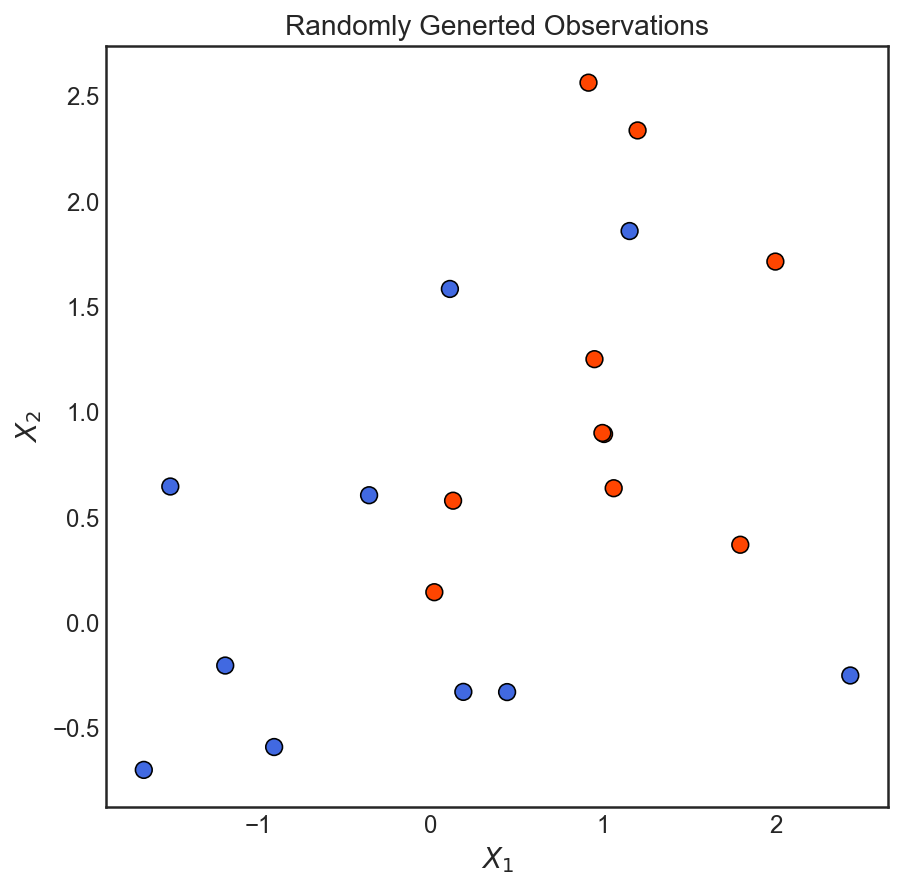

In [9]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
# Consider the index of all entries with y = -1, then add 1 to these entries
X[y == -1] = X[y == -1] +1

plt.style.use('seaborn-white')
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
# Ploting the data
_ = ax.scatter(X[:,0], X[:,1], s=70, c=y, cmap = ColorMap, edgecolor = 'Black')
_ = ax.set_xlabel(r'$X_1$')
_ = ax.set_ylabel(r'$X_2$')
_ = ax.set_title('Randomly Generted Observations')

Also, let's generate a test data set.

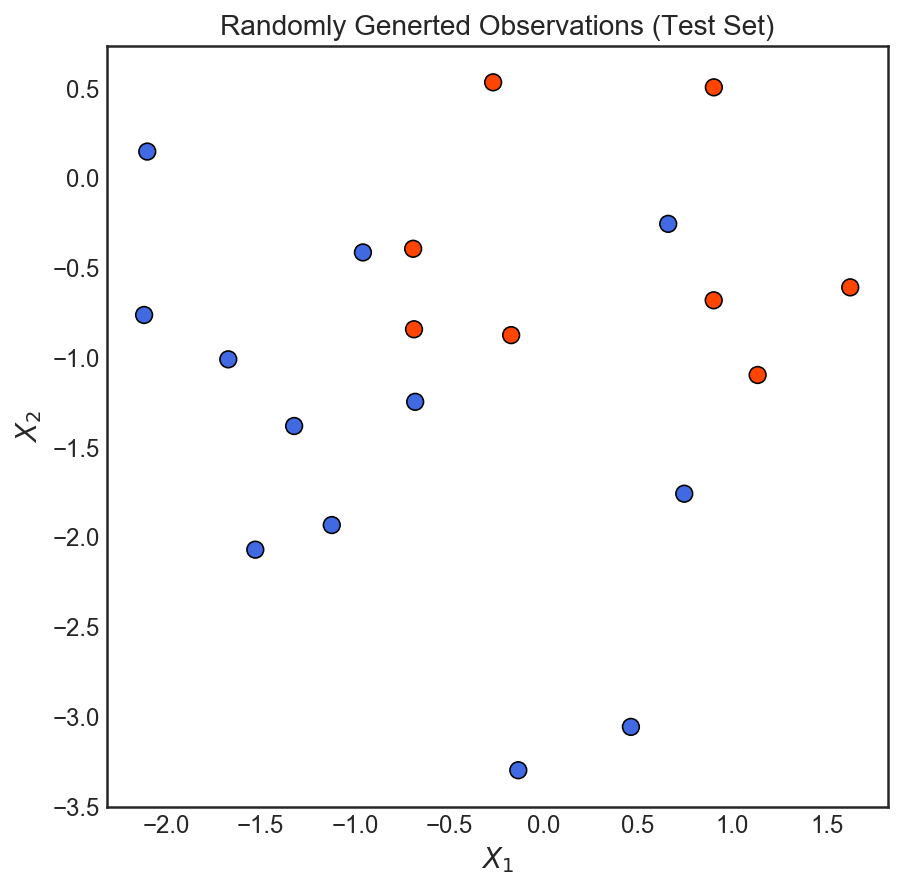

In [10]:
# Generating test data
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
# Ploting the data
_ = ax.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap = ColorMap, edgecolor = 'Black')
_ = ax.set_xlabel(r'$X_1$')
_ = ax.set_ylabel(r'$X_2$')
_ = ax.set_title('Randomly Generted Observations (Test Set)')

The Number of Support Vectors = 13


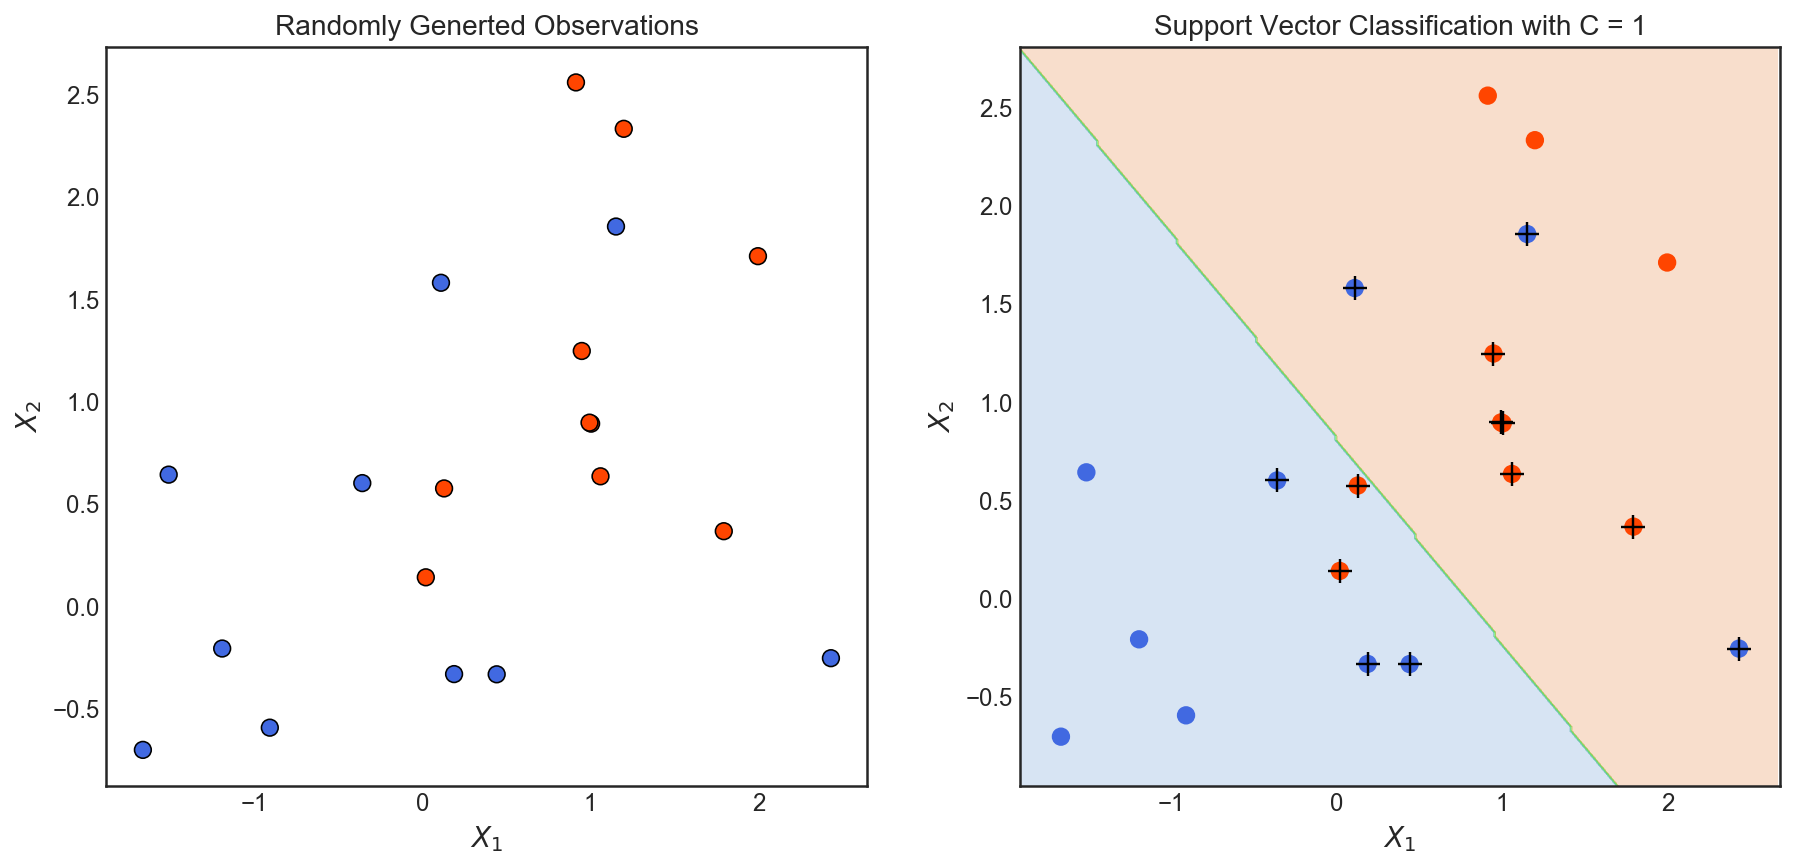

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6.8))
# Ploting the data
_ = ax[0].scatter(X[:,0], X[:,1], s=70, c=y, cmap = ColorMap, edgecolor = 'Black')
_ = ax[0].set_xlabel(r'$X_1$')
_ = ax[0].set_ylabel(r'$X_2$')
_ = ax[0].set_title('Randomly Generted Observations')

# Support Vector Classifier with linear kernel.
# Here Regularization parameter, C, is set to 1. The default value is also 1.
C= 1.0
svc = SVC(C, kernel='linear')
_ = svc.fit(X, y)
# Ploting Support Vector Classification. results
Plot_SVC(svc, X, y, ax = ax[1])
_ = ax[1].set_title('Support Vector Classification with C = %i' % C)

Moreover, note that the support vector points, the poinst that are the closest to the hyperplane, are highlighted with a plus sign.

-1   1
-1   2   6
 1   0  12

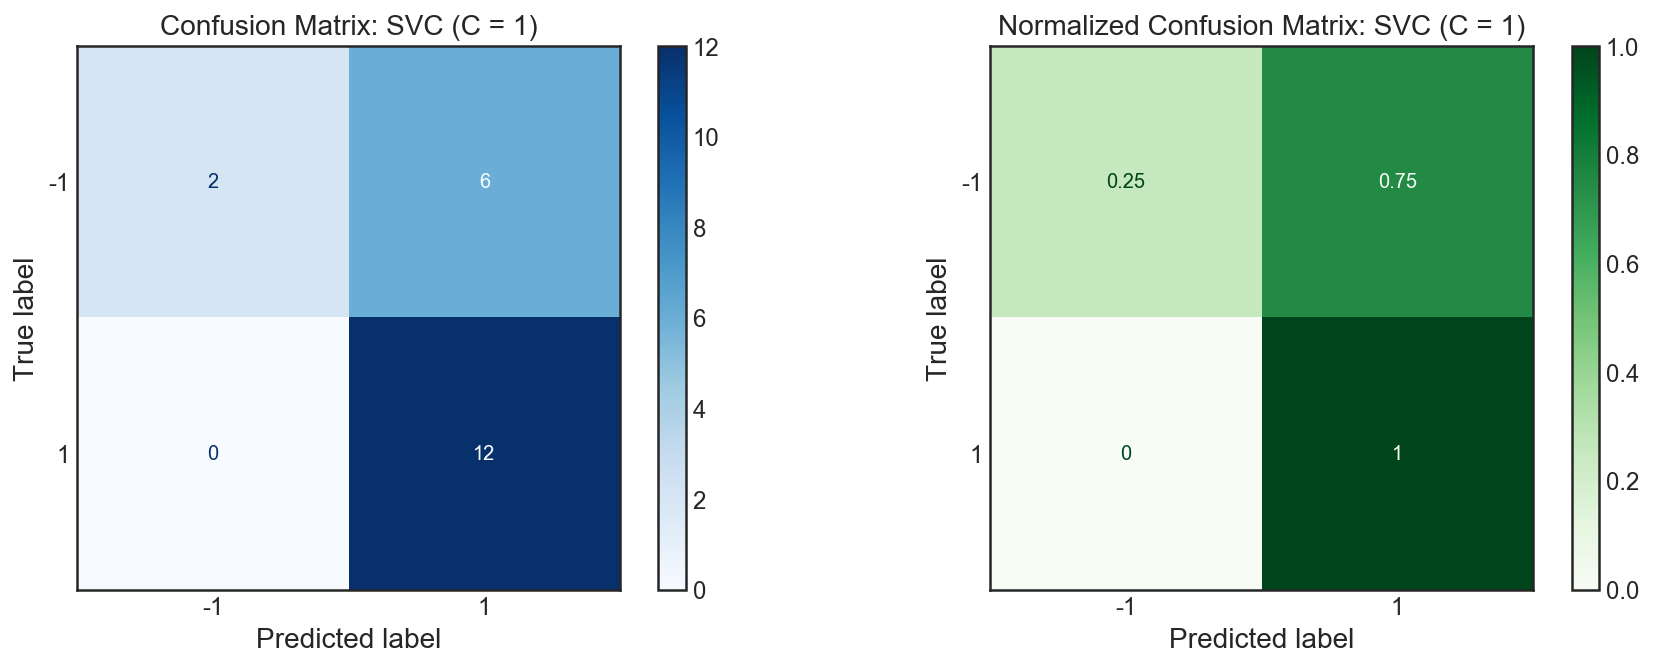

In [12]:
y_pred = svc.predict(X_test)
display(pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc.classes_, columns=svc.classes_))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = plot_confusion_matrix(svc, X_test, y_test, display_labels= svc.classes_, cmap= "Blues", normalize= None, ax = ax[0])
_ = ax[0].set_title('Confusion Matrix: SVC (C = %i)' % C)

_ = plot_confusion_matrix(svc, X_test, y_test, display_labels= svc.classes_, cmap= "Greens", normalize= 'true', ax = ax[1])
_ = ax[1].set_title('Normalized Confusion Matrix: SVC (C = %i)' % C)

Let's try the Support Vector Classification one more time. However, the difference this time is $C = 0.1$.

The Number of Support Vectors = 16


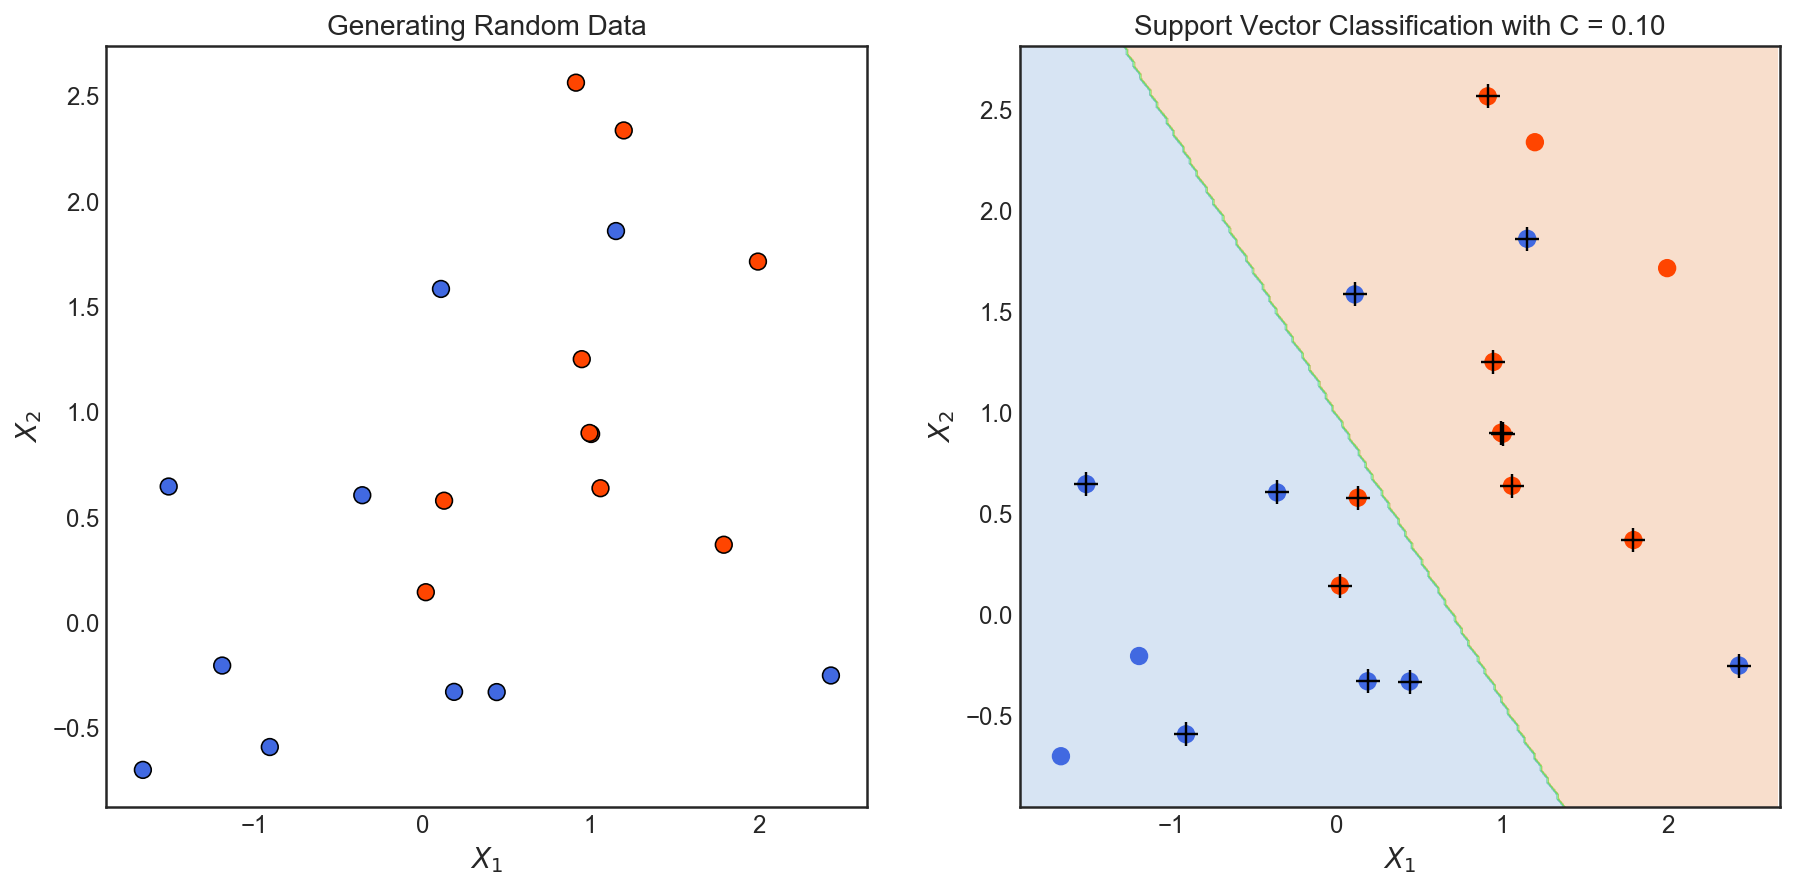

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
# Ploting the data
_ = ax[0].scatter(X[:,0], X[:,1], s=70, c=y, cmap = ColorMap, edgecolor = 'Black')
_ = ax[0].set_xlabel(r'$X_1$')
_ = ax[0].set_ylabel(r'$X_2$')
_ = ax[0].set_title('Generating Random Data')

# SVC
C= 0.1
svc = SVC(C, kernel='linear')
_ = svc.fit(X, y)

Plot_SVC(svc, X, y, ax = ax[1])
_ = ax[1].set_title('Support Vector Classification with C = %.2f' % C)

-1   1
-1   2   6
 1   0  12

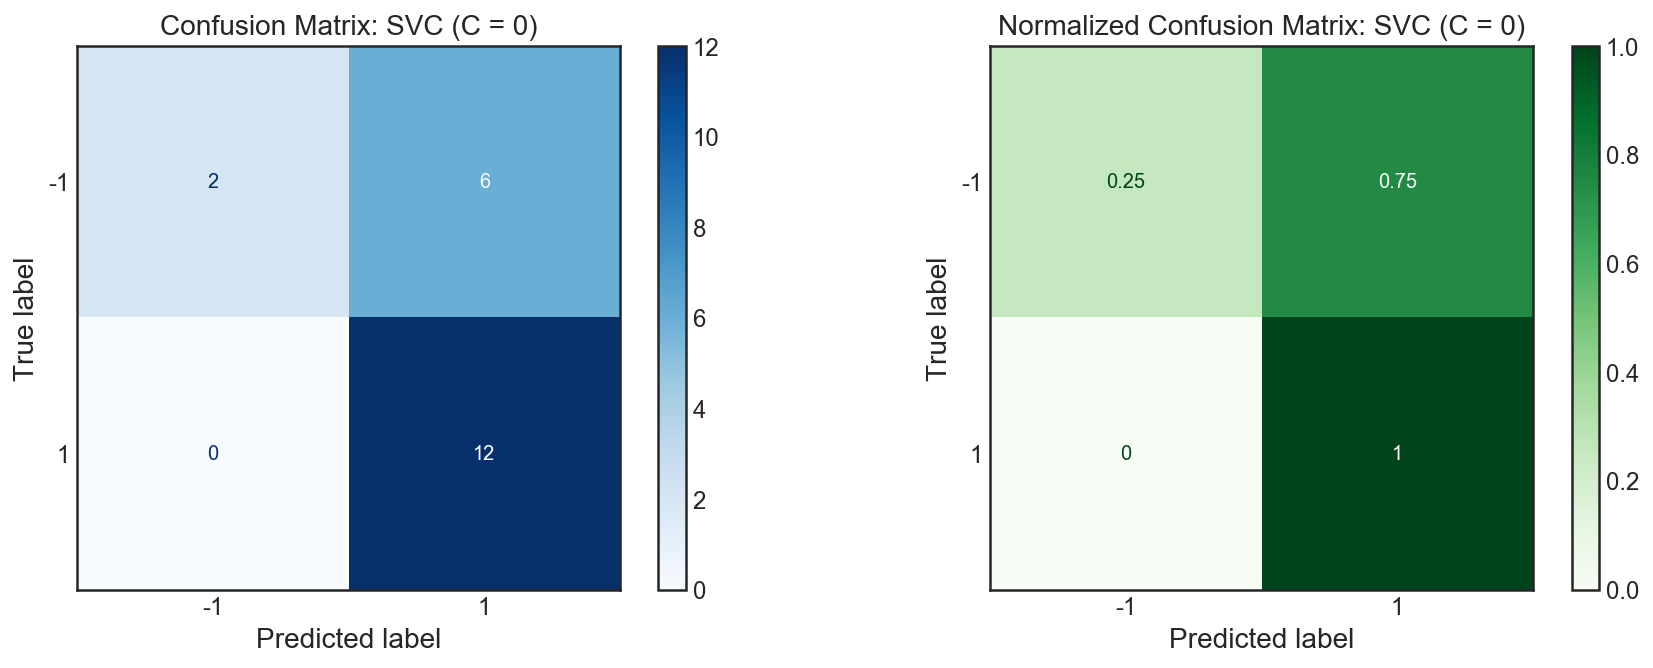

In [14]:
y_pred = svc.predict(X_test)
display(pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc.classes_, columns=svc.classes_))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = plot_confusion_matrix(svc, X_test, y_test, display_labels= svc.classes_, cmap= "Blues", normalize= None, ax = ax[0])
_ = ax[0].set_title('Confusion Matrix: SVC (C = %i)' % C)

_ = plot_confusion_matrix(svc, X_test, y_test, display_labels= svc.classes_, cmap= "Greens", normalize= 'true', ax = ax[1])
_ = ax[1].set_title('Normalized Confusion Matrix: SVC (C = %i)' % C)

Furthermore, we can use [**sklearn GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for searching over specified parameter values for an estimator.

In [15]:
Parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), param_grid = Parameters, cv=10, scoring='accuracy', return_train_score=True)
_  = clf.fit(X, y)

In [16]:
display(Latex(r'Best Regularization Parameter $C$ = %.e' % list(clf.best_params_.values())[0]))
display(Latex(r'Best Score = %.2f' % (100 * clf.best_score_)))
display(pd.DataFrame(clf.cv_results_)[['rank_test_score',
                           'params','mean_test_score']].sort_values(by=['rank_test_score']).style.hide_index().set_precision(2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [17]:
print('We see that cost = %.e results in the lowest cross-validation error rate.'% list(clf.best_params_.values())[0])

We see that cost = 1e-03 results in the lowest cross-validation error rate.


Thus, let's set $C = 10^{-3}$.

The Number of Support Vectors = 20


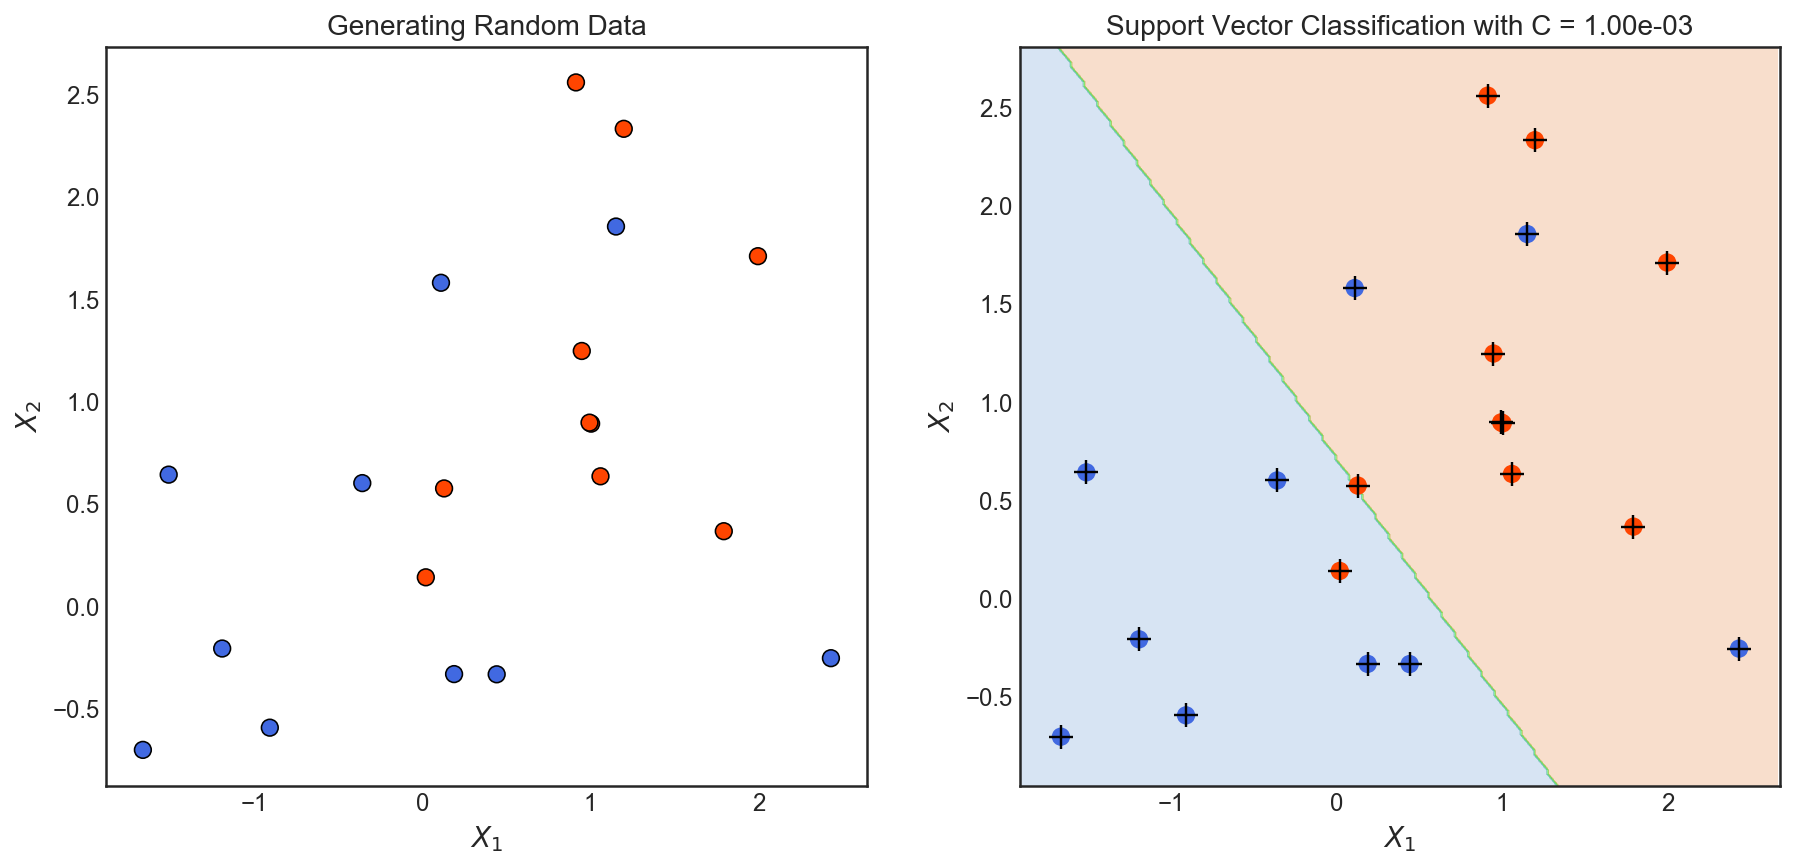

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6.8))
# Ploting the data
_ = ax[0].scatter(X[:,0], X[:,1], s=70, c=y, cmap = ColorMap, edgecolor = 'Black')
_ = ax[0].set_xlabel(r'$X_1$')
_ = ax[0].set_ylabel(r'$X_2$')
_ = ax[0].set_title('Generating Random Data')
# SVC
C= 1e-03
svc = SVC(C, kernel='linear')
_ = svc.fit(X, y)

Plot_SVC(svc, X, y, ax = ax[1])
_ = ax[1].set_title('Support Vector Classification with C = %.2e' % C)

-1   1
-1   2   6
 1   0  12

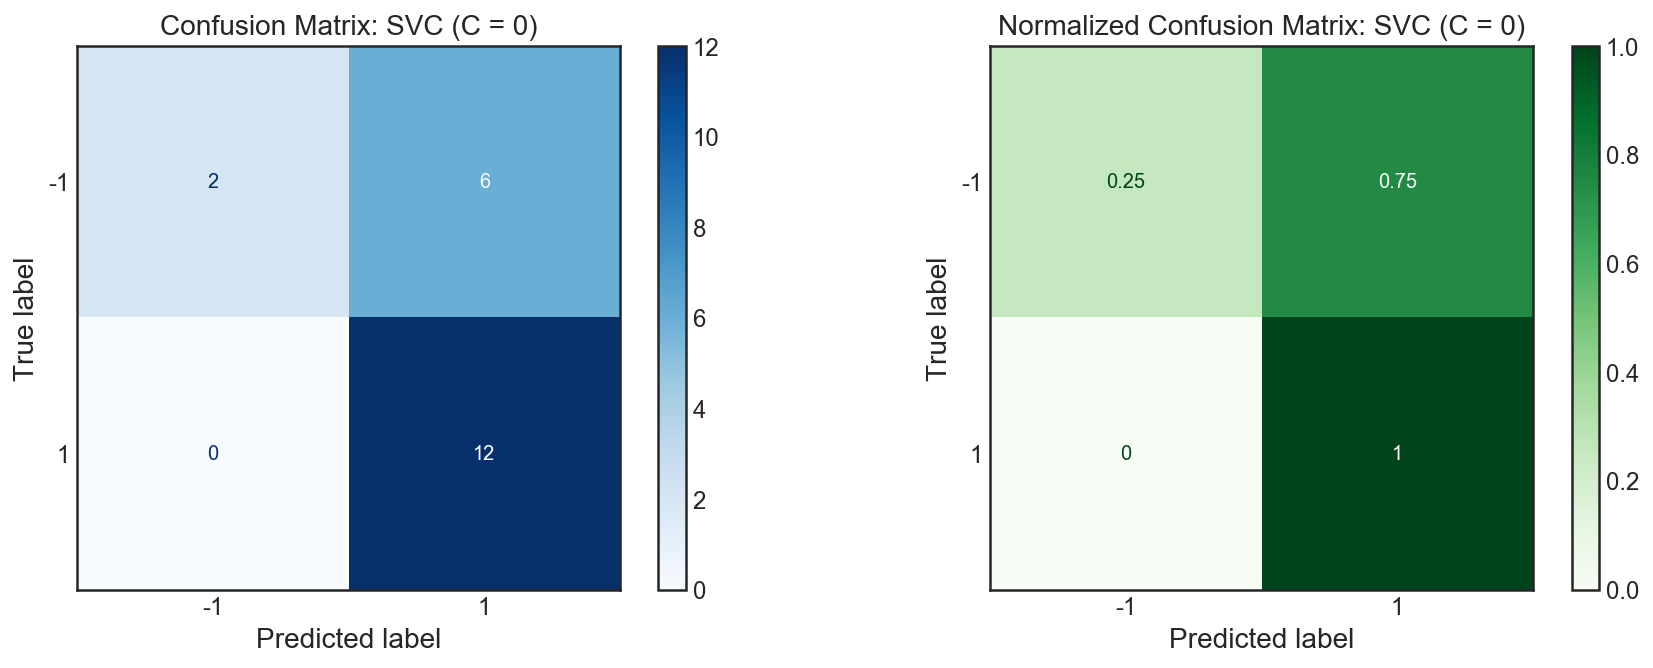

In [19]:
y_pred = svc.predict(X_test)
display(pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc.classes_, columns=svc.classes_))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = plot_confusion_matrix(svc, X_test, y_test, display_labels= svc.classes_, cmap= "Blues", normalize= None, ax = ax[0])
_ = ax[0].set_title('Confusion Matrix: SVC (C = %i)' % C)

_ = plot_confusion_matrix(svc, X_test, y_test, display_labels= svc.classes_, cmap= "Greens", normalize= 'true', ax = ax[1])
_ = ax[1].set_title('Normalized Confusion Matrix: SVC (C = %i)' % C)

## Support Vector Machine 

We first generate some data with a non-linear class boundary

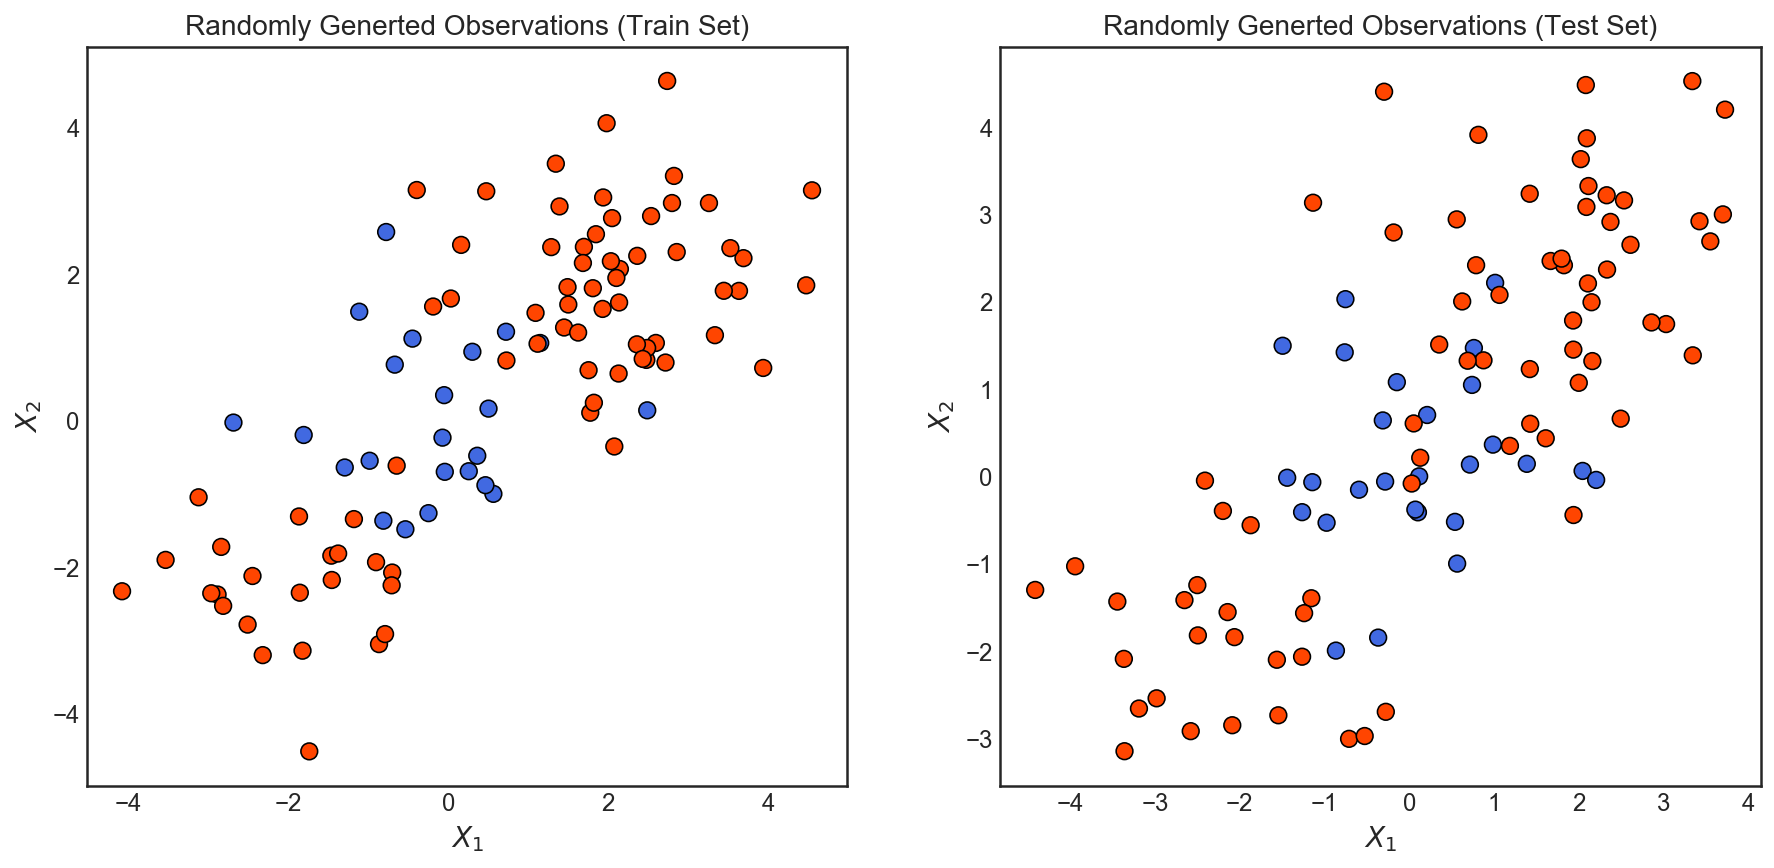

In [20]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2

y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

fig, ax = plt.subplots(1, 2, figsize=(15, 6.8))
# Ploting the data
_ = ax[0].scatter(X_train[:,0], X_train[:,1], s=70, c=y_train, cmap = ColorMap, edgecolor = 'Black')
_ = ax[0].set_xlabel(r'$X_1$')
_ = ax[0].set_ylabel(r'$X_2$')
_ = ax[0].set_title('Randomly Generted Observations (Train Set)')

_ = ax[1].scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap = ColorMap, edgecolor = 'Black')
_ = ax[1].set_xlabel(r'$X_1$')
_ = ax[1].set_ylabel(r'$X_2$')
_ = ax[1].set_title('Randomly Generted Observations (Test Set)')

We then fit the training data with a radial kernel and $\gamma$ = 1:

The Number of Support Vectors = 51


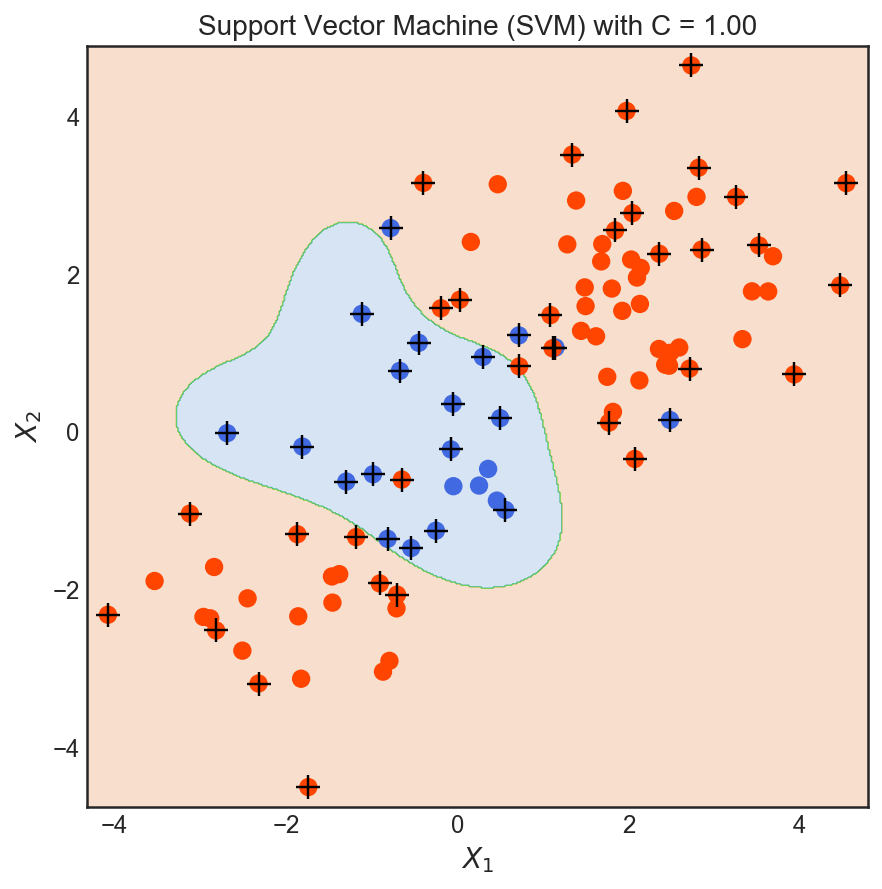

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
# SVC
C= 1
svm = SVC(C, kernel='rbf', gamma=1)
_ = svm.fit(X_train, y_train)

Plot_SVC(svm, X_train, y_train, ax = ax)
_ = ax.set_title('Support Vector Machine (SVM) with C = %.2f' % C)

We can reduce the number of training errors if we increase the value of cost $C$.

The Number of Support Vectors = 36


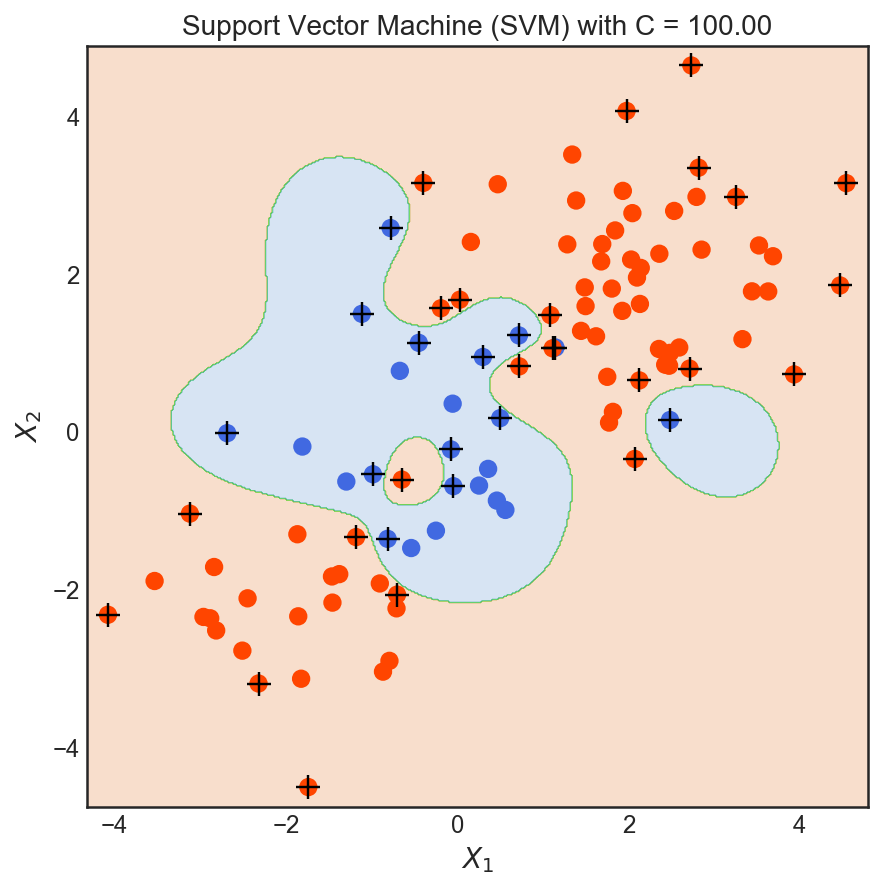

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
# SVC
C= 100
svm = SVC(C, kernel='rbf', gamma=1)
_ = svm.fit(X_train, y_train)

Plot_SVC(svm, X_train, y_train, ax = ax)
_ = ax.set_title('Support Vector Machine (SVM) with C = %.2f' % C)


However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

Thus, let's use [**sklearn GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for searching over specified parameter values for an estimator.

In [23]:
Parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), param_grid = Parameters, cv=10, scoring='accuracy', return_train_score=True)
_  = clf.fit(X_train, y_train)

In [24]:
display(Latex(r'Best Regularization Parameter $C$ = %.2f and $\gamma$ = %.2f' % (list(clf.best_params_.values())[0],
                                                           list(clf.best_params_.values())[1])))
display(Latex(r'Best Score = %.2f' % (100 * clf.best_score_)))
display(pd.DataFrame(clf.cv_results_)[['rank_test_score',
                           'params','mean_test_score']].sort_values(by=['rank_test_score']).style.hide_index()\
        .background_gradient(cmap='YlGn', subset=['mean_test_score']).set_precision(4))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## ROC Curves

In this section, we use a number of **sklearn** tools.

| Package | Description |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) | Compute Receiver operating characteristic (ROC) |
| [sklearn.metrics .roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) | Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. |
| [sklearn.metrics .auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) | Compute Area Under the Curve (AUC) using the trapezoidal rule |

We define two [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) classifications using [radial basis function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) (RBF) kernel. However, the only difference would be

In [25]:
svm1 = SVC(C=1, kernel='rbf', gamma=2)
_ = svm1.fit(X_train, y_train)

svm2 = SVC(C=1, kernel='rbf', gamma=50)
_ = svm2.fit(X_train, y_train)

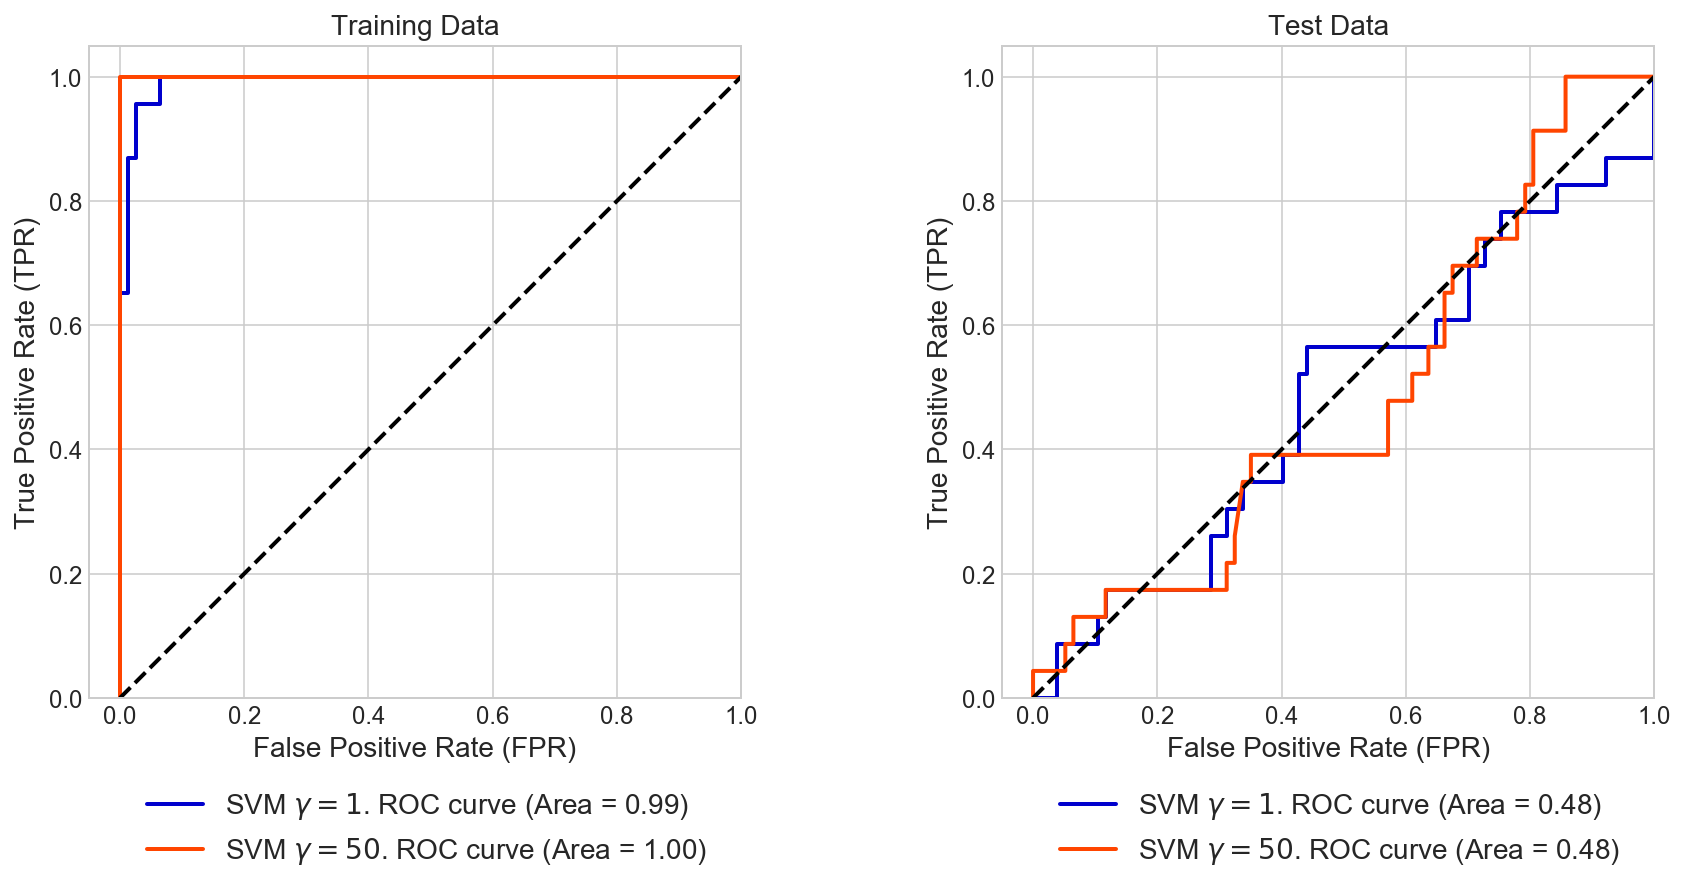

In [26]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15,6))

## Left Plot##

# false positive rates, true positive rates and thresholds
fpr1, tpr1, threshold1 = roc_curve(y_train, svm1.decision_function(X_train))
fpr2, tpr2, threshold2 = roc_curve(y_train, svm2.decision_function(X_train))

_ = ax[0].plot(fpr1, tpr1, lw=2, label='SVM $\gamma = 1$. ROC curve (Area = %0.2f)' % auc(fpr1, tpr1), color='MediumBlue')
_ = ax[0].plot(fpr2, tpr2, lw=2, label='SVM $\gamma = 50$. ROC curve (Area = %0.2f)' % auc(fpr2, tpr2), color='OrangeRed')
_ = ax[0].set_title('Training Data')

## Right Plot ##

# false positive rates, true positive rates and thresholds
fpr1, tpr1, threshold1 = roc_curve(y_train, svm1.decision_function(X_test))
fpr2, tpr2, threshold2 = roc_curve(y_train, svm2.decision_function(X_test))

_ = ax[1].plot(fpr1, tpr1, lw=2, label='SVM $\gamma = 1$. ROC curve (Area = %0.2f)' % auc(fpr1, tpr1), color='MediumBlue')
_ = ax[1].plot(fpr2, tpr2, lw=2, label='SVM $\gamma = 50$. ROC curve (Area = %0.2f)' % auc(fpr2, tpr2), color='OrangeRed')
_ = ax[1].set_title('Test Data')

del fpr1, tpr1, fpr2, tpr2

## Settings
for a in ax:
    a.plot([0, 1], [0, 1], 'k--', lw=2)
    a.set_xlim([-0.05, 1.0])
    a.set_ylim([0.0, 1.05])
    a.set_xlabel('False Positive Rate (FPR)')
    a.set_ylabel('True Positive Rate (TPR)')
    a.legend(loc='center left', bbox_to_anchor=(.05, -0.2), fontsize = 14)
    a.set_aspect('equal', 'box')
del a

We could expect that a higher value of $\gamma$ (which adds more flexibility) scores better on training data but worse on the test data.

## SVM with Multiple Classes

We explore that setting here by generating a third class of observations.

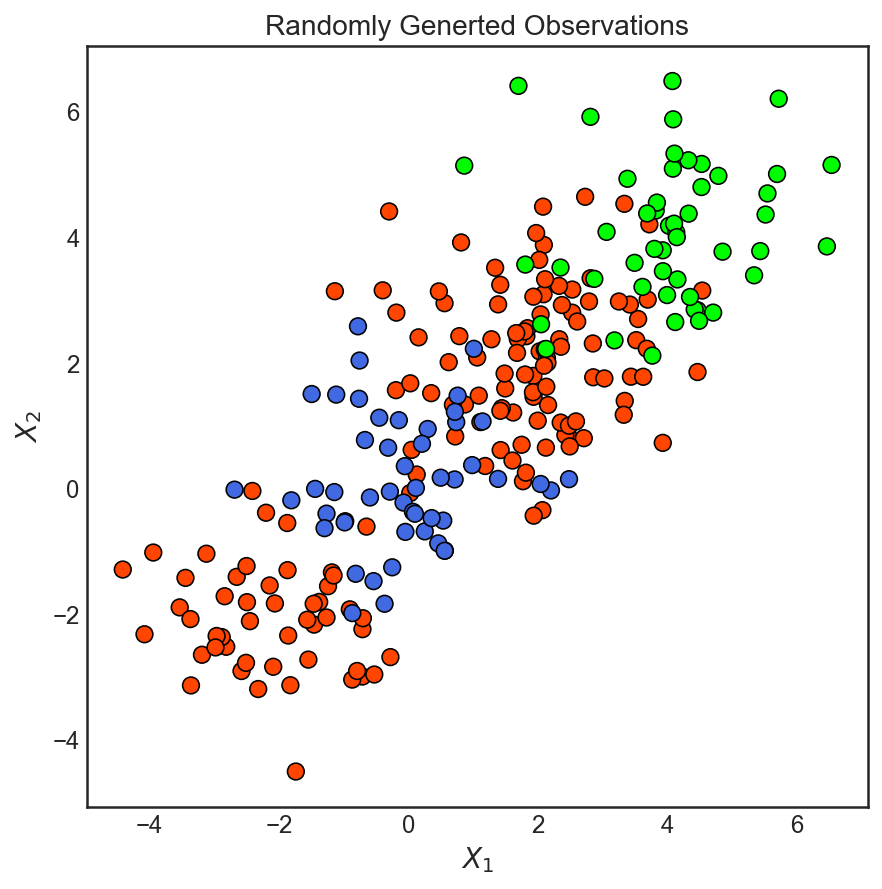

In [27]:
np.random.seed(8)
X = np.vstack([X, np.random.randn(50,2)])
y = np.hstack([y, np.repeat(0,50)])
X[y ==0] = X[y == 0] +4

plt.style.use('seaborn-white')
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
# Ploting the data
_ = ax.scatter(X[:,0], X[:,1], s=70, c=y, cmap = ColorMap, edgecolor = 'Black')
_ = ax.set_xlabel(r'$X_1$')
_ = ax.set_ylabel(r'$X_2$')
_ = ax.set_title('Randomly Generted Observations')

The Number of Support Vectors = 128


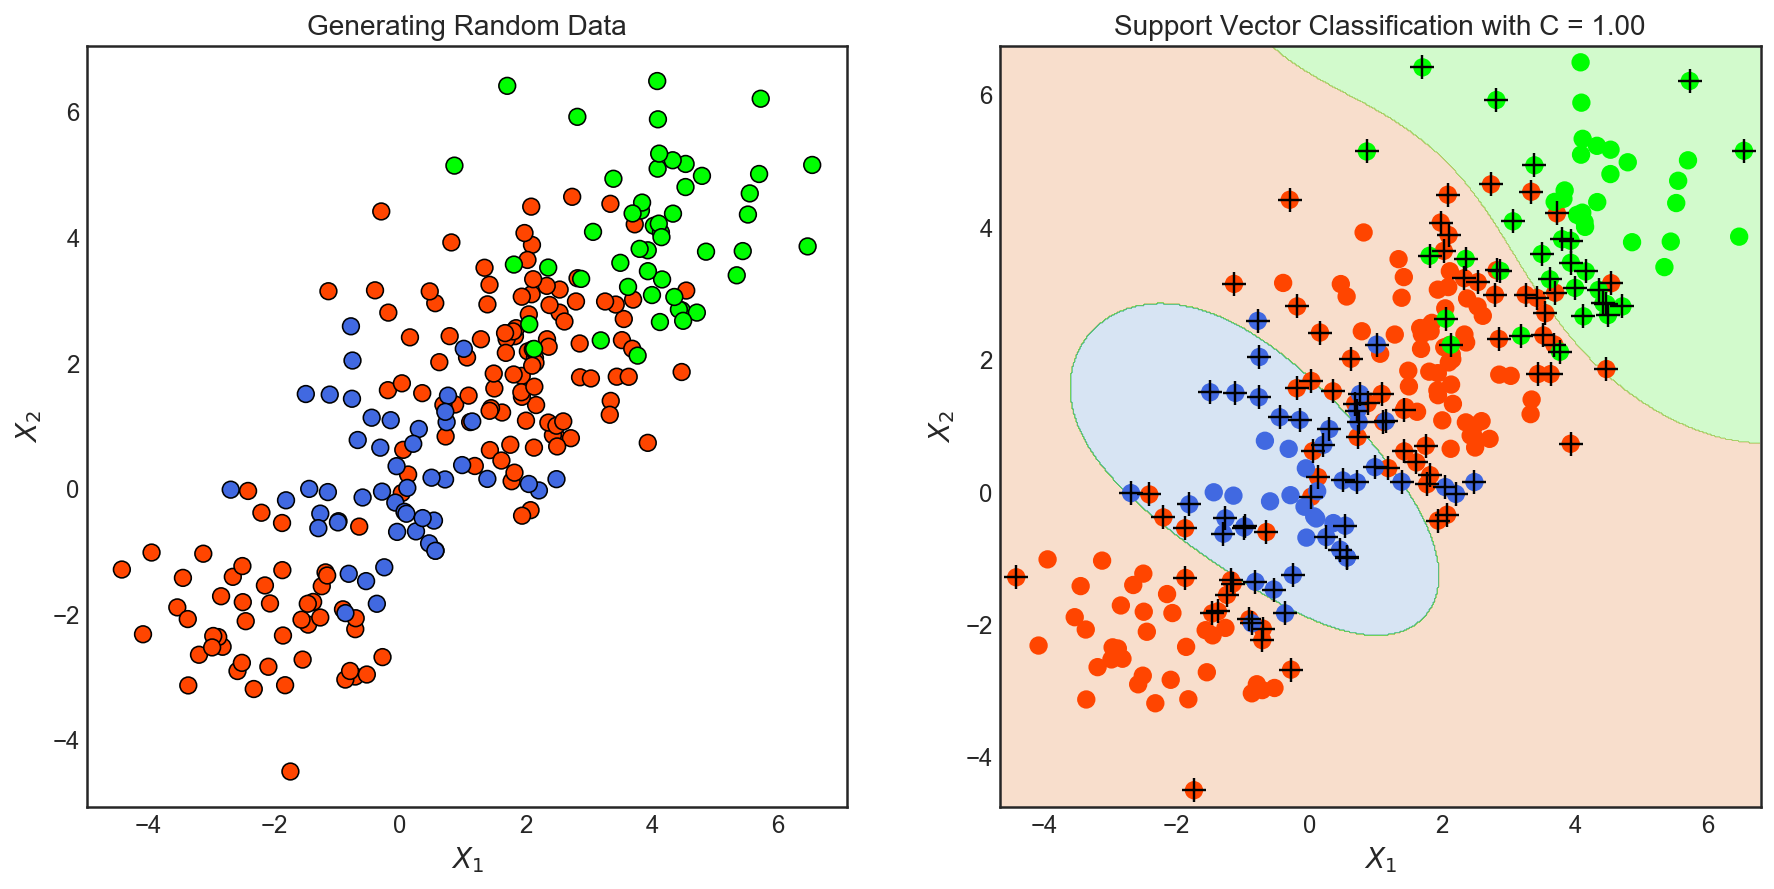

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
# Ploting the data
_ = ax[0].scatter(X[:,0], X[:,1], s=70, c=y, cmap = ColorMap, edgecolor = 'Black')
_ = ax[0].set_xlabel(r'$X_1$')
_ = ax[0].set_ylabel(r'$X_2$')
_ = ax[0].set_title('Generating Random Data')

# SVC
C= 1
svm = SVC(C, kernel='rbf')
_ = svm.fit(X, y)

Plot_SVC(svm, X, y, ax = ax[1])
_ = ax[1].set_title('Support Vector Classification with C = %.2f' % C)

## Application to Gene Expression Data

We now examine the **Khan data set**, which consists of a number of tissue samples corresponding to four distinct types of small round blue cell tumors. For each tissue sample, gene expression measurements are available. The data set consists of training data, xtrain and ytrain, and testing data, xtest and ytest.

This dataset can be extracted from [**ISLR R package**](https://cran.r-project.org/web/packages/ISLR/index.html). You can try the following syntax in [**R**](https://www.r-project.org/about.html),
```R
library (ISLR)
write.csv(Khan$xtrain, "Khan_xtrain.csv")
write.csv(Khan$xtest, "Khan_xtest.csv")
write.csv(Khan$ytrain, "Khan_ytrain.csv")
write.csv(Khan$ytest, "Khan_ytest.csv")
```

In [29]:
# Train Set
X_train = pd.read_csv('Data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('Data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
# Test Set
X_test = pd.read_csv('Data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('Data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

This data set consists of expression measurements for 2,308 genes. The training and test sets consist of 63 and 20 observations respectively

In [30]:
print(Back.MAGENTA + Fore.BLACK + Style.BRIGHT + 'Train Set:')
display(pd.Series(y_train).value_counts(sort=False).to_frame('Count').T)

print(Back.MAGENTA + Fore.BLACK + Style.BRIGHT + 'Test Set:')
display(pd.Series(y_test).value_counts(sort=False).to_frame('Count').T)

Train Set:


1   2   3   4
Count  8  23  12  20

Test Set:


1  2  3  4
Count  3  6  6  5

In [31]:
svc = SVC(kernel='linear')
_ = svc.fit(X_train, y_train)

1   2   3   4
1  8   0   0   0
2  0  23   0   0
3  0   0  12   0
4  0   0   0  20

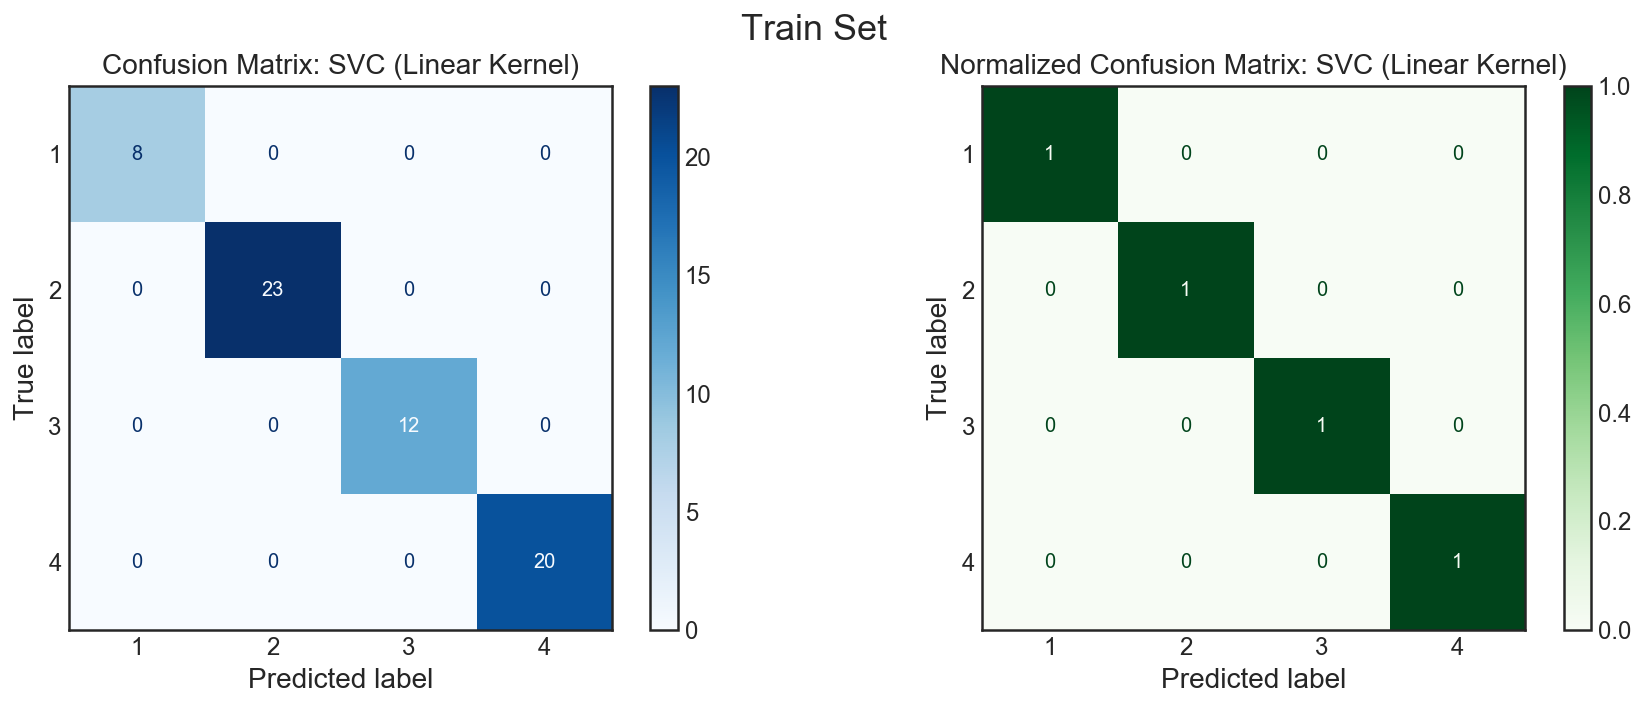

In [32]:
y_pred = svc.predict(X_train)
display(pd.DataFrame(confusion_matrix(y_train, y_pred), index=svc.classes_, columns=svc.classes_))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Train Set', fontsize = 18)
_ = plot_confusion_matrix(svc, X_train, y_train, display_labels= svc.classes_, cmap= "Blues", normalize= None, ax = ax[0])
_ = ax[0].set_title('Confusion Matrix: SVC (Linear Kernel)')

_ = plot_confusion_matrix(svc, X_train, y_train, display_labels= svc.classes_, cmap= "Greens", normalize= 'true', ax = ax[1])
_ = ax[1].set_title('Normalized Confusion Matrix: SVC (Linear Kernel)')

1  2  3  4
1  3  0  0  0
2  0  6  0  0
3  0  2  4  0
4  0  0  0  5

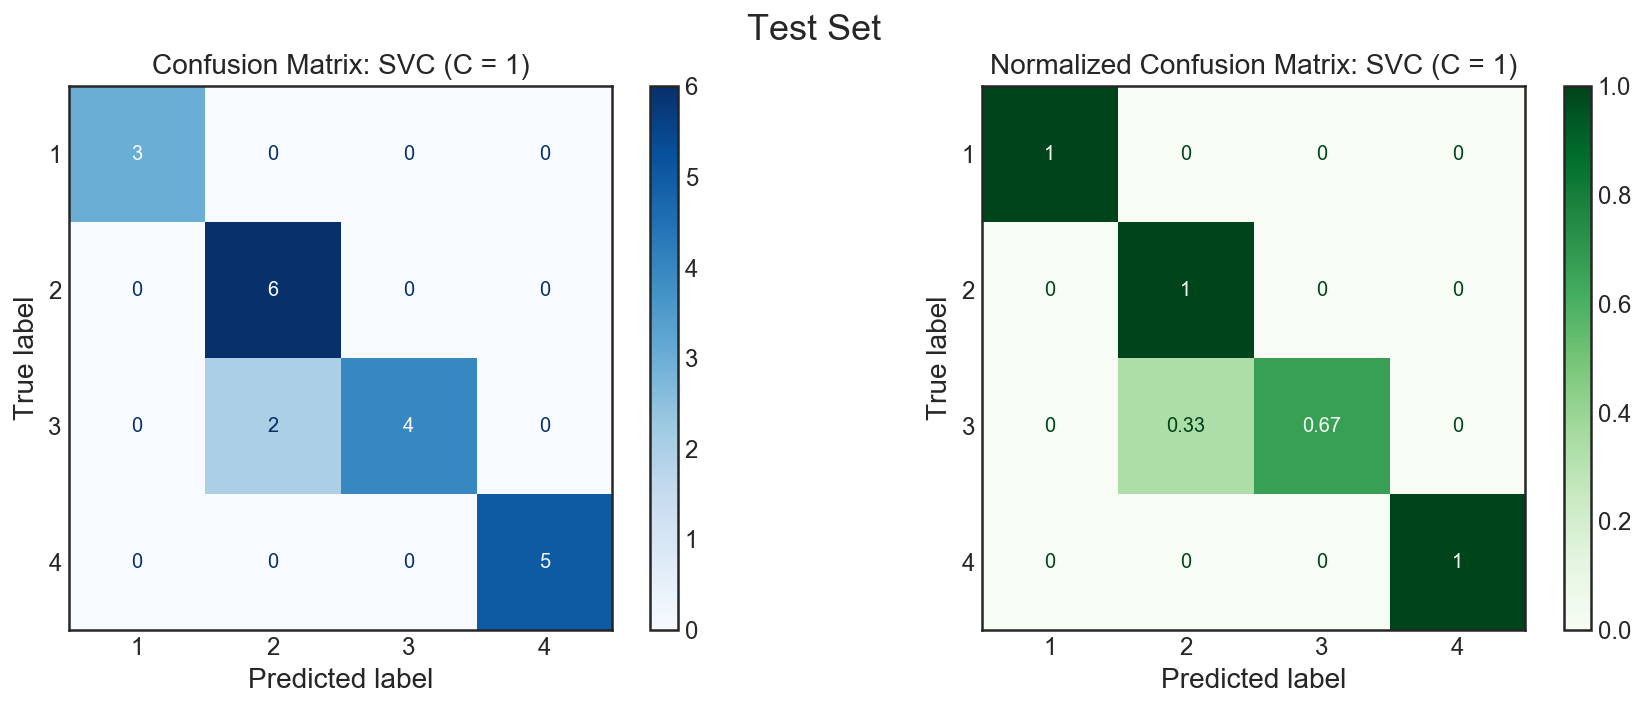

In [33]:
y_pred = svc.predict(X_test)
display(pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc.classes_, columns=svc.classes_))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Test Set', fontsize = 18)
_ = plot_confusion_matrix(svc, X_test, y_test, display_labels= svc.classes_, cmap= "Blues", normalize= None, ax = ax[0])
_ = ax[0].set_title('Confusion Matrix: SVC (C = %i)' % C)

_ = plot_confusion_matrix(svc, X_test, y_test, display_labels= svc.classes_, cmap= "Greens", normalize= 'true', ax = ax[1])
_ = ax[1].set_title('Normalized Confusion Matrix: SVC (C = %i)' % C)

***

## Refrences

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). [An introduction to statistical learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7) (Vol. 112, pp. 3-7). New York: springer.

* Jordi Warmenhoven, [ISLR-python](https://github.com/JWarmenhoven/ISLR-python)
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). [ISLR: Data for an Introduction to Statistical Learning with Applications in R](https://cran.r-project.org/web/packages/ISLR/index.html)

***